### 코랩 마운팅 

In [1]:
# 마운팅 성공

### 데이터 로드 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/code/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
card_df.shape

(284807, 31)

In [4]:
from sklearn.model_selection import train_test_split

def get_preprecessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop("Time", axis = 1,inplace = True)
  return df_copy


In [5]:
def get_train_test_dataset(df = None):
  df_copy = get_preprecessed_df(df)

  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:,-1]

  X_train, X_test, y_train, y_test = \
  train_test_split(X_features, y_target, test_size = 0.3, random_state = 0, stratify = y_target)

  return X_train, X_test, y_train, y_test
  

In [6]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [7]:
y_train.value_counts() / y_train.shape[0] *100


0    99.827451
1     0.172549
Name: Class, dtype: float64

In [8]:
y_test.value_counts()/y_test.shape[0]*100

0    99.826785
1     0.173215
Name: Class, dtype: float64

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
from sklearn.linear_model import LogisticRegression 

In [11]:
lr_clf = LogisticRegression()

In [12]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_prob = lr_clf.predict_proba(X_test)[:,1]

In [13]:
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
lr_pred_prob

array([0.00141341, 0.00010521, 0.00019433, ..., 0.00032351, 0.00084536,
       0.00016143])

In [15]:
get_clf_eval(y_test,lr_pred,lr_pred_prob)

오차 행렬
[[85281    14]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8679, 재현율: 0.6216,    F1: 0.7244, AUC:0.9609


In [16]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train,tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,1]
  get_clf_eval(tgt_test,pred,pred_proba)

### 함수를 사용하여 다른 classification 에 사용하는 모델 사용 

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
get_model_train_eval(gnb, X_train, X_test, y_train, y_test)


오차 행렬
[[83388  1907]
 [   27   121]]
정확도: 0.9774, 정밀도: 0.0597, 재현율: 0.8176,    F1: 0.1112, AUC:0.9582


In [18]:
get_model_train_eval(LogisticRegression(), X_train, X_test, y_train, y_test)

오차 행렬
[[85281    14]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8679, 재현율: 0.6216,    F1: 0.7244, AUC:0.9609


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
get_model_train_eval(dt_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85270    25]
 [   36   112]]
정확도: 0.9993, 정밀도: 0.8175, 재현율: 0.7568,    F1: 0.7860, AUC:0.8782


In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5 , metric = "minkowski",p=2)

get_model_train_eval(neigh, X_train, X_test, y_train, y_test)

오차 행렬
[[85289     6]
 [   60    88]]
정확도: 0.9992, 정밀도: 0.9362, 재현율: 0.5946,    F1: 0.7273, AUC:0.8681


In [20]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000,num_leaves = 64,n_jobs = -1,boost_from_average = False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9797


In [21]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000,num_leaves = 64,n_jobs = -1,boost_from_average = True)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85261    34]
 [   74    74]]
정확도: 0.9987, 정밀도: 0.6852, 재현율: 0.5000,    F1: 0.5781, AUC:0.7531


### 중요 데이터 분포도 변환 후 모델 학습 / 예측 / 평가

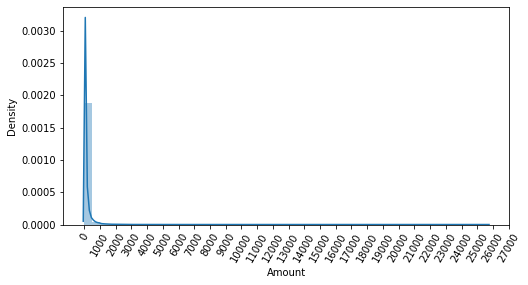

In [22]:
import  seaborn as sns
plt.figure(figsize = (8,4))
plt.xticks(range(0,30000,1000),rotation = 60)
sns.distplot(card_df['Amount'])

In [23]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df = None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_trasnform(df_copy['Amount'].values.reshape(-1,1))

  df_copy.insert(0,'Amount_Scaled',amount_n)

  df_copy.drop(['Time','Amount'], axis=1,inplace = True)
  return df_copy

In [24]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print("로지스틱 회귀 예측 성능")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

print("LightGBM 예측 성능")
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64,n_jobs = -1,boost_from_average=False )
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)


로지스틱 회귀 예측 성능
오차 행렬
[[85281    14]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8679, 재현율: 0.6216,    F1: 0.7244, AUC:0.9609
LightGBM 예측 성능
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9797


In [25]:
import numpy as np
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy(['Amount']))
  df_copy.insert(0,'Amount_scaled',amount_n)
  df_copy.drop(['Time','Amount'],axis=1, inplace = True)
  return df_copy

In [26]:
X_train,X_test, y_train, y_test = get_train_test_dataset(card_df)
get_model_train_eval(lr_clf,X_train,X_test, y_train, y_test )
get_model_train_eval(lgbm_clf,X_train,X_test, y_train, y_test )

오차 행렬
[[85281    14]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8679, 재현율: 0.6216,    F1: 0.7244, AUC:0.9609
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9797


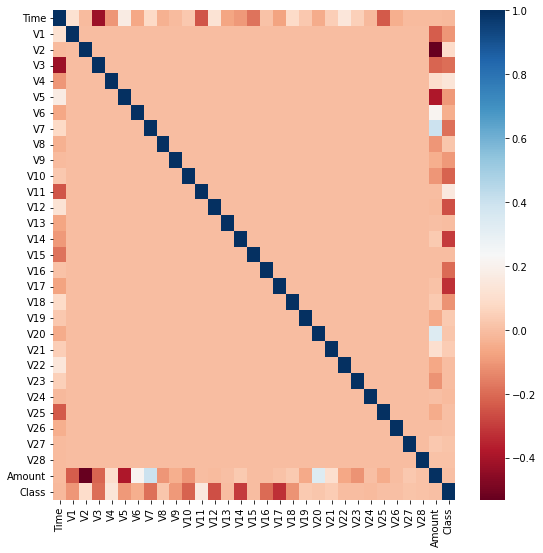

In [29]:
import seaborn as sns

plt.figure(figsize = (9,9))
corr  = card_df.corr()
sns.heatmap(corr,cmap = 'RdBu')

In [30]:
def get_outlier(df=None, column=None, weight = 1.5):
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values,25)
  quantile_75 = np.percentile(fraud.values,75)

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr*weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  outlier_index = fraud[(fraud <lowest_val)|(fraud>highest_val)].index

  return outlier_index

In [32]:
np.percentile(card_df['V14'].values,100)

10.5267660517847

In [33]:
np.max(card_df['V14'])

10.5267660517847

In [34]:
outlier_index = get_outlier(df = card_df, column='V14',weight = 1.5)
print('이상치 데이터 인덱스: ',outlier_index)

이상치 데이터 인덱스:  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [35]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0,'Amount_Scaled',amount_n)
  df_copy.drop(['Time','Amount'],axis=1, inplace=True)

  outlier_index = get_outlier(df = card_df, column='V14',weight = 1.5)
  df_copy.drop(outlier_index, axis = 0, inplace = True)
  return df_copy

In [36]:
X_train, X_test,y_train,y_test  = get_train_test_dataset(card_df)
get_model_train_eval(lr_clf, X_train,X_test,y_train,y_test )

오차 행렬
[[85281    14]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8679, 재현율: 0.6216,    F1: 0.7244, AUC:0.9609


In [38]:
get_model_train_eval(lgbm_clf, X_train,X_test,y_train,y_test ) 

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9797


In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [45]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211605,-8.367621,7.402969,-5.114191,-2.966792,-0.985904,-1.660018,0.397816,1.008250,5.290976,9.315735,...,3.589299,-0.557927,0.349087,0.301734,0.662330,1.145939,-0.012273,1.513736,0.669504,0.69
231628,-1.290662,0.764452,-0.169233,-1.688528,1.984718,-0.717210,1.667635,-0.228295,-0.959071,-0.679429,...,0.057620,0.138615,0.390374,-0.678774,0.292254,1.425865,0.265341,0.051405,0.103879,55.47
110643,-0.606860,0.233923,2.633361,-0.155762,-0.328850,-0.070593,0.173023,0.113394,0.680147,-0.686651,...,-0.129287,0.007393,0.265045,-0.040615,0.406088,-0.498823,0.121851,-0.046840,-0.087259,11.50
11478,1.374168,-0.330389,0.812971,-0.183112,-1.074771,-0.933788,-0.544238,-0.348237,0.614925,0.080408,...,0.078163,-0.134742,0.016793,0.002610,0.714527,0.536175,-0.307487,-0.003555,0.013024,10.00
243724,-2.146505,-7.603113,-4.928224,1.449173,-2.083871,-0.984759,3.629816,-1.302973,-1.434148,-0.021909,...,4.009181,1.274986,-0.857670,-2.109682,0.169338,-0.322888,0.777822,-0.552258,0.304777,2290.05


In [47]:
y_train.head(2)

211605    0
231628    0
Name: Class, dtype: int64

In [48]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [49]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
[[83866  1429]
 [   16   132]]
정확도: 0.9831, 정밀도: 0.0846, 재현율: 0.8919,    F1: 0.1545, AUC:0.9813


In [54]:
import matplotlib.pyplot as pyplot
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

  plt.figure(figsize = (8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')

  start,end = plt.xlim()
  plt.xticks(np.rund(np.arnage(start, end ,0.1),2))

  plt.xlabel('Threshold value')
  plt.ylabel('PRecision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

AttributeError: ignored

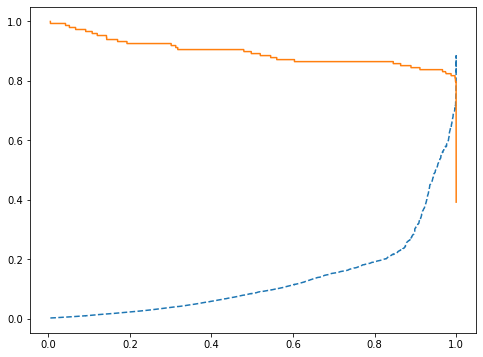

In [55]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [56]:
lgbm_clf = LGBMClassifier(n_estimators = 1000,num_leaves = 64, n_jobs = -1,boost_from_average = False )
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
[[85283    12]
 [   30   118]]
정확도: 0.9995, 정밀도: 0.9077, 재현율: 0.7973,    F1: 0.8489, AUC:0.9843
